In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return 3*x**2 - 4*x +5

In [3]:
f(3)

20

In [4]:
xs = np.arange(-5,5, 0.25)
ys = f(xs)

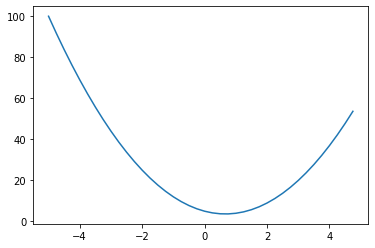

In [5]:
plt.plot(xs, ys)

In [6]:
h = 0.00001
x= 2/3
(f(x+h)-f(x))/h

3.0000002482211127e-05

In [7]:
a = 2
b = -3
c= 10
d= a*b +c
print(d)

4


In [8]:
h = 0.0001

a = 2
b = -3
c= 10
d1= a*b +c
c += h
d2 = a*b +c

print('d1', d1)
print('d2', d2)
print('slope', (d2-d1)/h)

d1 4
d2 4.0001
slope 0.9999999999976694


In [9]:
class Value:
    def __init__(self, data, _children = (), _op='', label=''):
        self.data = data
        self.grad = 0.0
        self._backward = lambda: None
        self._prev = set(_children)
        self._op = _op
        self.label = label
        
    def __repr__(self):
        return f'Value(data={self.data})'
    
    def __add__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data + other.data, (self, other), '+')
        
        def _backward():
            self.grad += 1.0 * out.grad
            other.grad += 1.0 * out.grad
        out._backward = _backward
        return out

    def __mul__(self, other):
        other = other if isinstance(other, Value) else Value(other)
        out = Value(self.data * other.data, (self, other), '*')
        
        def _backward():
            self.grad +=  other.data * out.grad
            other.grad += self.data * out.grad
            
        out._backward = _backward    
        return out
    
    def __pow__(self, other):
        assert isinstance(other, (int, float))
        out = Value(self.data**other, (self,), f'**{other}')
        
        def _backward():
            self.grad += other*(self.data**(other-1))*out.grad
        out._backward = _backward    
    
    def __rmul__(self, other):
        return self*other
    
    def __truediv__(self, other):
        return self * other**-1
    
    def __neg__(self):
        return self*-1
    
    def __sub__(self, other):
        return self+(-other)
    
    def tanh(self):
        x = self.data
        t = (math.exp(2*x)-1)/(math.exp(2*x)+1)
        out = Value(t,(self,), 'tanh')
        
        def _backward():
            self.grad += (1- t**2) * out.grad
        out._backward = _backward        
        return out
    
    def exp(self):
        x = self.data
        out = Value(math.exp(x), (self, ), 'exp')
        
        def _backward():
            self.grad += out.data * out.grad
        out._backward = _backward
        
        return out
    
    def backward(self):
        
        topo = []
        visited = set()
        def build_topo(v):
            if v not in visited:
                visited.add(v)
                for child in v._prev:
                    build_topo(child)
                topo.append(v)
        build_topo(self)
        
        self.grad = 1.0
        for node in reversed(topo):
            node._backward()
    

In [10]:
#inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
#weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
#bias
b = Value(6.88137358, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label ='x1*w1' 
x2w2 = x2*w2; x2w2.label ='x2*w2' 
x1w1x2w2 = x1*w1 +x2*w2; x1w1x2w2.label ='x1*w1 +x2*w2'
n = x1w1x2w2 +b; n.label ='n'
o = n.tanh(); o.label = 'o'
o.backward()

In [11]:
x1-w1

Value(data=5.0)

In [12]:
#inputs
x1 = Value(2.0, label = 'x1')
x2 = Value(0.0, label = 'x2')
#weights
w1 = Value(-3.0, label = 'w1')
w2 = Value(1.0, label = 'w2')
#bias
b = Value(6.88137358, label = 'b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label ='x1*w1' 
x2w2 = x2*w2; x2w2.label ='x2*w2' 
x1w1x2w2 = x1*w1 +x2*w2; x1w1x2w2.label ='x1*w1 +x2*w2'
n = x1w1x2w2 +b; n.label ='n'
e = (2*n).exp()
o = (e-1) / (e+1)
o.label = 'o'
o.backward()


TypeError: unsupported operand type(s) for *: 'float' and 'NoneType'

In [128]:
x1w1x2w2.grad =0.5 
x1w1.grad =0.5 
x2w2.grad =0.5 
b.grad = 0.5
n.grad = 0.5
x2.grad = w2.data * x2w2.grad
w2.grad = x2.data * x2w2.grad

In [129]:
o.backward()

In [124]:
n._backward()
x1w1x2w2._backward()
x2w2._backward()

In [123]:
o.grad = 1.0

In [125]:
x2w2.grad

0.5

In [54]:
def lol():
    h =1e-4
    
    a = Value(2.0, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0,  label='c')
    e=a*b
    d= a*b+c
    f = Value(-2.0, label ='f')
    L= d*f
    L1 = L.data
    
    a = Value(2.0 + 0*h, label='a')
    b = Value(-3.0, label='b')
    c = Value(10.0,  label='c')
    c.data+= h
    e=a*b
    d= e+c 
    f = Value(-2.0 , label ='f')
    L= d*f 
    L2 = L.data 
    
    print ((L2-L1)/h)
    
lol()

-1.9999999999953388


In [110]:
o.data

0.707106777676776

In [111]:
n.grad = 0.5

In [13]:
class Neuron:
    def __init__(self, nin):
        self.w = [Value(np.random.uniform(-1,1)) for _ in range(nin)]
        self.b = Value(np.random.uniform(-1,1))
        
    def __call__(self, x):
        # w * x + b
        act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
        out = act.tanh()
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
class Layer:
    
    def __init__(self, nin, nout):
        self.neurons = [Neuron(nin) for _ in range(nout)]
        
    def __call__(self, x):
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
class MLP:    
    
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
        
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x    
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
      

In [14]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4,4,1])
n(x)      

Value(data=-0.7291025935905133)

In [15]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]
ypred

[Value(data=-0.7291025935905133),
 Value(data=-0.521849079847913),
 Value(data=-0.6010223871039142),
 Value(data=-0.7210777875952954)]

In [35]:
[(yout - ygt)**2 for ygt, yout in zip(ys, ypred)]

[None, None, None, None]

In [18]:
n.layers[0].neurons[0].w[0].data

0.29294907824453875

In [19]:
for p in n.parameters():
    p.data += - 0.001 * p.grad

In [22]:
n.layers[0].neurons[0].w[0].data

0.29294907824453875

In [27]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred))
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad

TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'